<a href="https://colab.research.google.com/github/asadnhasan/Machine-Learning-Projects/blob/main/CNN/CIFAR_10_Dataset_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

170498071/170498071 [==============================] - 4s 0us/step


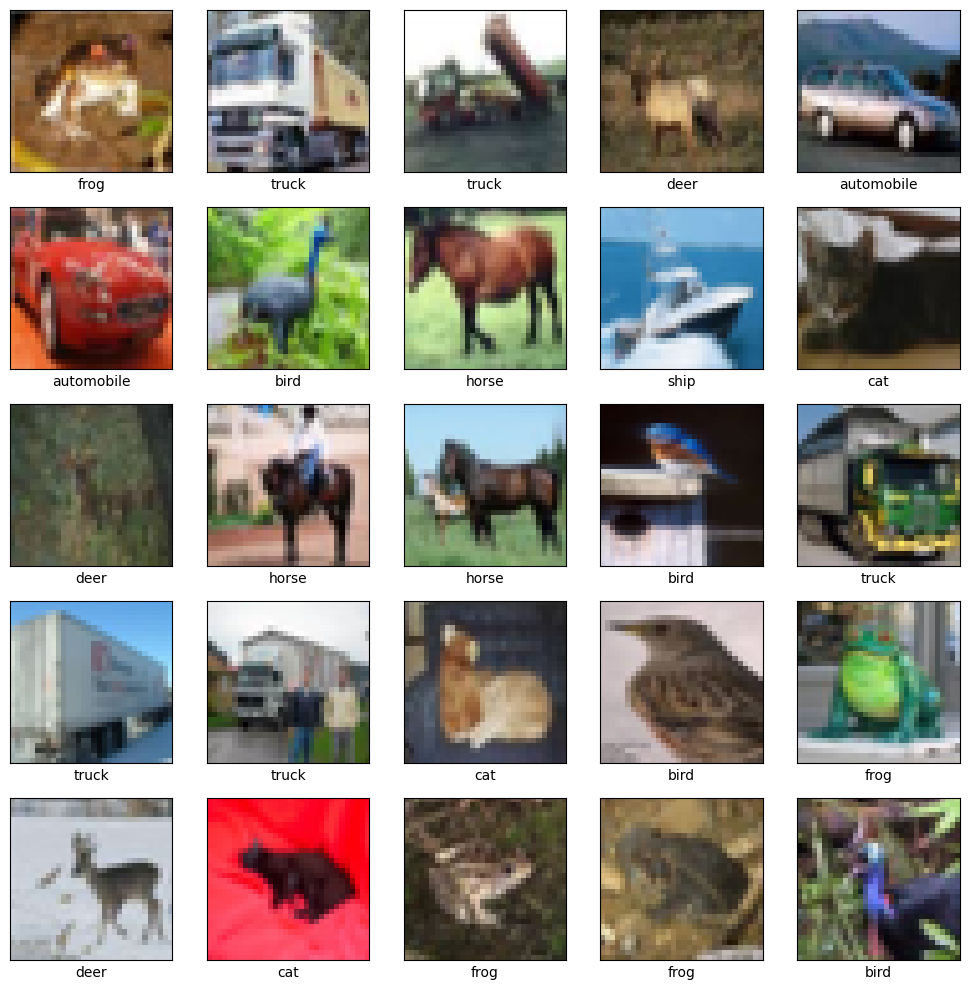

In [3]:
# Display some images from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    label_index = np.argmax(train_labels[i])
    plt.xlabel(class_names[label_index])
plt.tight_layout()
plt.show()

In [4]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model and capture the training history
history = model.fit(train_images, train_labels, epochs=50, batch_size=64)

Epoch 1/50
782/782 [==============================] - 16s 5ms/step - loss: 1.7478 - accuracy: 0.3517
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 1.4193 - accuracy: 0.4897
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 1.2803 - accuracy: 0.5465
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.1732 - accuracy: 0.5881
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.1106 - accuracy: 0.6115
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 1.0555 - accuracy: 0.6320
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 1.0104 - accuracy: 0.6501
Epoch 8/50
782/782 [==============================] - 3s 4ms/step - loss: 0.9688 - accuracy: 0.6629
Epoch 9/50
782/782 [==============================] - 3s 4ms/step - loss: 0.9286 - accuracy: 0.6759
Epoch 10/50
782/782 [==============================] - 4s 5ms/step - loss: 0.8977 - accuracy: 0.688

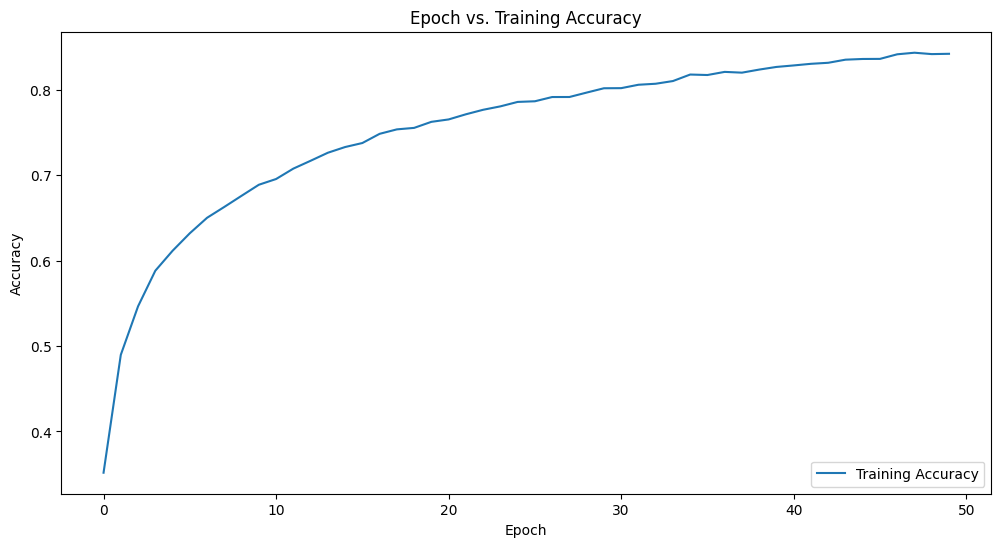

In [7]:
# Plot training accuracy over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs. Training Accuracy')
plt.legend(loc='lower right')
plt.show()

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 1.0710 - accuracy: 0.7362
Test accuracy: 0.7361999750137329


In [9]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [10]:
predicted_labels

array([3, 8, 8, ..., 5, 4, 7])

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
# Generate confusion matrix
predicted_probs = model.predict(test_images)
predicted_labels = np.argmax(predicted_probs, axis=1)

313/313 [==============================] - 1s 2ms/step


In [13]:
# Convert test_labels to 1D
true_labels = np.argmax(test_labels, axis=1)

In [14]:
print(test_labels.shape)
print(true_labels.shape)
print(predicted_labels.shape)

(10000, 10)
(10000,)
(10000,)


In [15]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

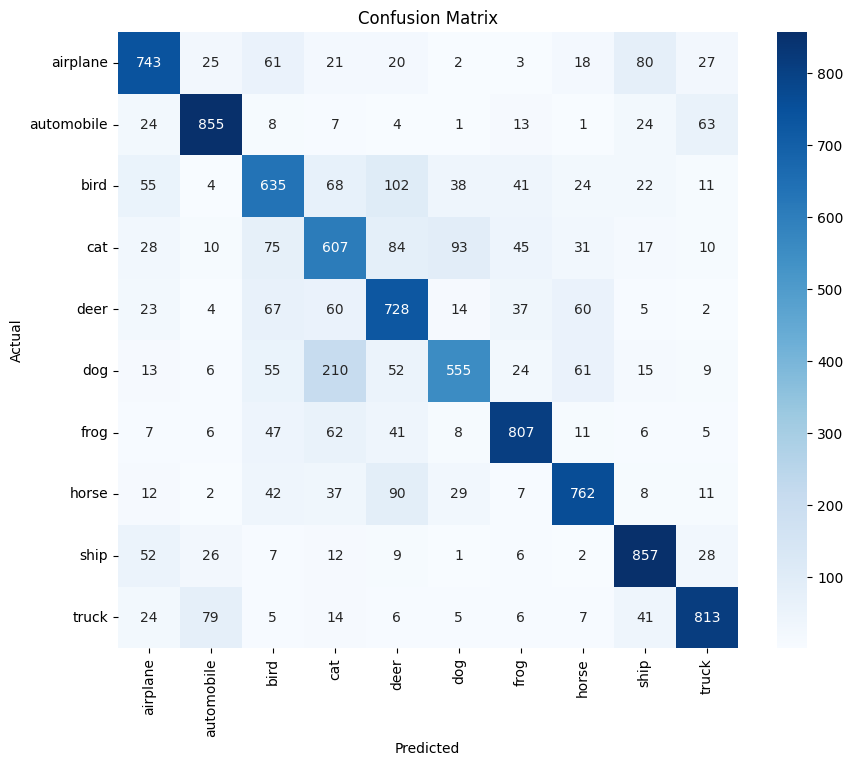

In [16]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**Deploying the following techniques to improve the test accuracy:**

**Data Augmentation:** We'll use Keras's ImageDataGenerator for this.
**Deeper Network:** For simplicity, let's just add more convolutional layers and neurons.
**Regularization:** We've already added dropout; we can also add batch normalization.
**Learning Rate Scheduling:** We'll use Keras's ReduceLROnPlateau callback.

In [17]:
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(train_images)

In [19]:
# Improved CNN model with batch normalization, dropout, and deeper layers
model = Sequential()

In [20]:
# Block 1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [21]:
# Block 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

In [22]:
# Block 3
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

In [23]:
# Dense layers
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

In [26]:
# Defining the train and test labels again for model training
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [27]:
# Reload the CIFAR-10 dataset to ensure we're starting with the original labels.
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [28]:
# One-hot encode the labels
train_labels_cat = to_categorical(train_labels, num_classes=10)
test_labels_cat = to_categorical(test_labels, num_classes=10)

In [29]:
# Check the shape of the augmented labels
for _, batch_labels in datagen.flow(train_images, train_labels_cat, batch_size=64):
    print(batch_labels.shape)
    break

(64, 10)


In [30]:
# Train the model using augmented data
batch_size = 64
epochs = 50
history = model.fit(datagen.flow(train_images, train_labels_cat, batch_size=batch_size),
                    steps_per_epoch=train_images.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(test_images, test_labels_cat),
                    callbacks=[reduce_lr, early_stopping])

Epoch 1/50
781/781 [==============================] - 38s 43ms/step - loss: 1.7050 - accuracy: 0.3951 - val_loss: 1.2649 - val_accuracy: 0.5365 - lr: 0.0010
Epoch 2/50
781/781 [==============================] - 41s 52ms/step - loss: 1.3026 - accuracy: 0.5323 - val_loss: 1.0178 - val_accuracy: 0.6336 - lr: 0.0010
Epoch 3/50
781/781 [==============================] - 32s 41ms/step - loss: 1.1165 - accuracy: 0.6036 - val_loss: 1.0825 - val_accuracy: 0.6175 - lr: 0.0010
Epoch 4/50
781/781 [==============================] - 34s 44ms/step - loss: 1.0006 - accuracy: 0.6493 - val_loss: 0.9528 - val_accuracy: 0.6715 - lr: 0.0010
Epoch 5/50
781/781 [==============================] - 32s 42ms/step - loss: 0.9159 - accuracy: 0.6807 - val_loss: 0.9589 - val_accuracy: 0.6707 - lr: 0.0010
Epoch 6/50
781/781 [==============================] - 33s 42ms/step - loss: 0.8589 - accuracy: 0.7006 - val_loss: 0.9135 - val_accuracy: 0.6903 - lr: 0.0010
Epoch 7/50
781/781 [==============================] - 31s 

In [31]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.5035 - accuracy: 0.8338
Test accuracy: 0.8338000178337097


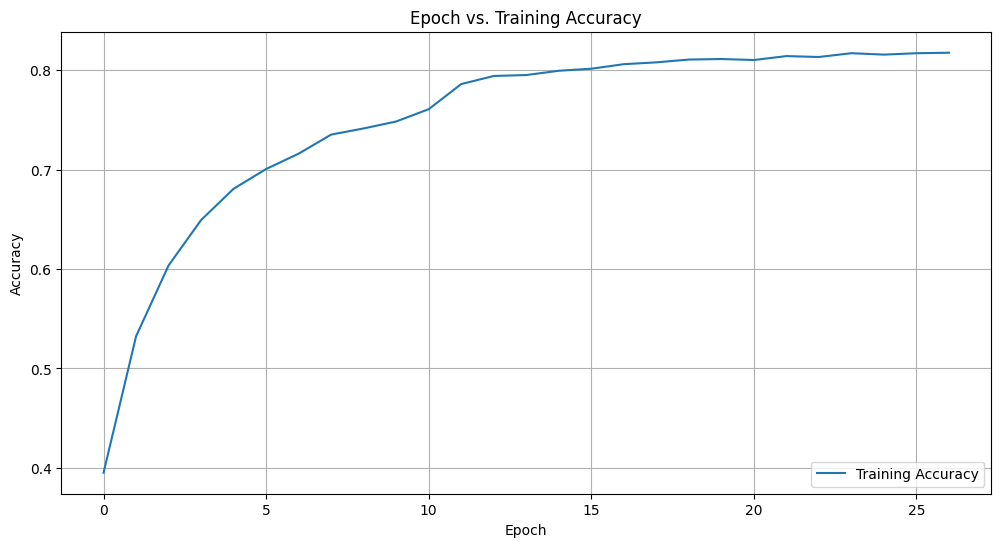

In [32]:
# Plot training accuracy over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs. Training Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [33]:
# Generate predictions for the test set
predicted_probs = model.predict(test_images)
predicted_labels = np.argmax(predicted_probs, axis=1)

313/313 [==============================] - 1s 2ms/step


In [34]:
# Convert the one-hot encoded true labels back to integer labels
true_labels = np.argmax(test_labels_cat, axis=1)

In [35]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

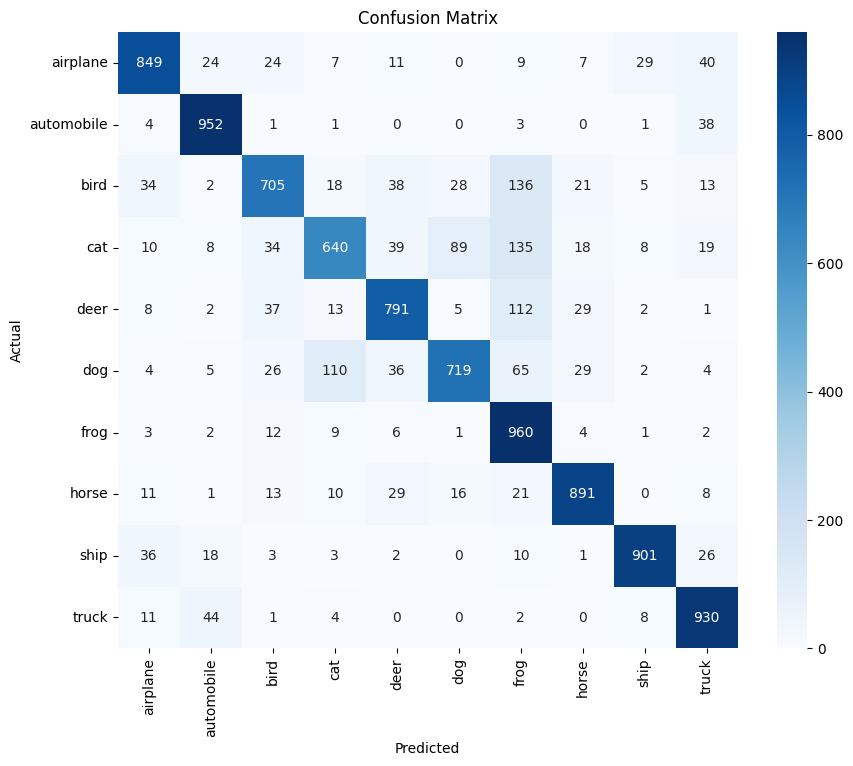

In [43]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

`We will use the ResNet50 architecture with weights pre-trained on ImageNet, and fine-tune it for CIFAR-10 to further enhance the accuracy`

In [36]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

In [37]:
# Load the base model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [38]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [39]:
# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

In [40]:
# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [41]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# Train the model using augmented data
history = model.fit(datagen.flow(train_images, train_labels_cat, batch_size=batch_size),
                    steps_per_epoch=train_images.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(test_images, test_labels_cat),
                    callbacks=[reduce_lr, early_stopping])

Epoch 1/50
781/781 [==============================] - 43s 49ms/step - loss: 1.6774 - accuracy: 0.4351 - val_loss: 1.2406 - val_accuracy: 0.5569 - lr: 0.0010
Epoch 2/50
781/781 [==============================] - 39s 50ms/step - loss: 1.4441 - accuracy: 0.4923 - val_loss: 1.1877 - val_accuracy: 0.5831 - lr: 0.0010
Epoch 3/50
781/781 [==============================] - 39s 50ms/step - loss: 1.3904 - accuracy: 0.5126 - val_loss: 1.1663 - val_accuracy: 0.5885 - lr: 0.0010
Epoch 4/50
781/781 [==============================] - 39s 50ms/step - loss: 1.3651 - accuracy: 0.5208 - val_loss: 1.1605 - val_accuracy: 0.5972 - lr: 0.0010
Epoch 5/50
781/781 [==============================] - 35s 45ms/step - loss: 1.3443 - accuracy: 0.5288 - val_loss: 1.1478 - val_accuracy: 0.6002 - lr: 0.0010
Epoch 6/50
781/781 [==============================] - 38s 49ms/step - loss: 1.3358 - accuracy: 0.5329 - val_loss: 1.1470 - val_accuracy: 0.5983 - lr: 0.0010
Epoch 7/50
781/781 [==============================] - 36s 

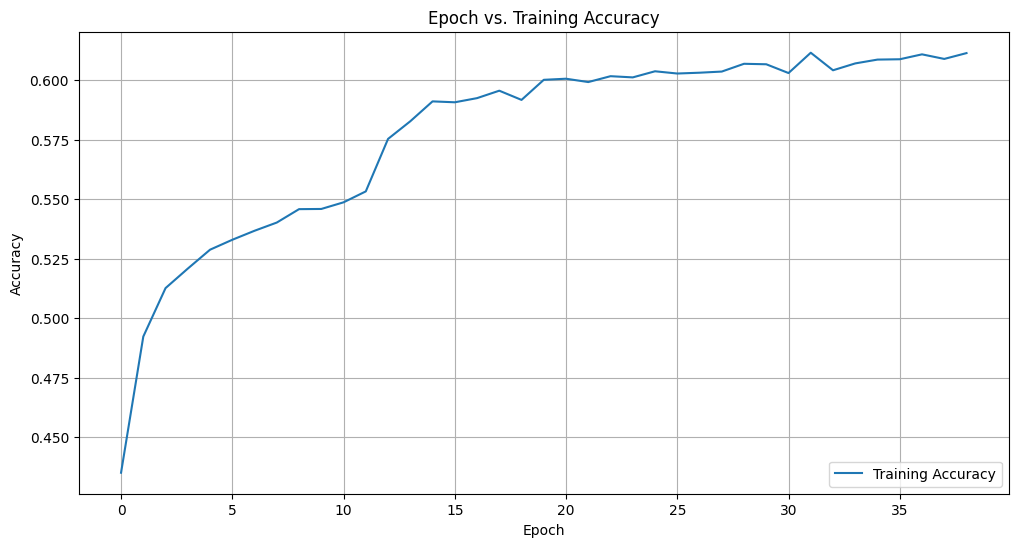

In [44]:
# Plot training accuracy over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs. Training Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [45]:
# Generate predictions for the test set
predicted_probs = model.predict(test_images)
predicted_labels = np.argmax(predicted_probs, axis=1)

313/313 [==============================] - 4s 8ms/step


In [46]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)

print(f"Test accuracy for the ResNet50 transfer learning model: {test_acc * 100:.2f}%")


313/313 [==============================] - 5s 15ms/step - loss: 1.0237 - accuracy: 0.6430
Test accuracy for the ResNet50 transfer learning model: 64.30%


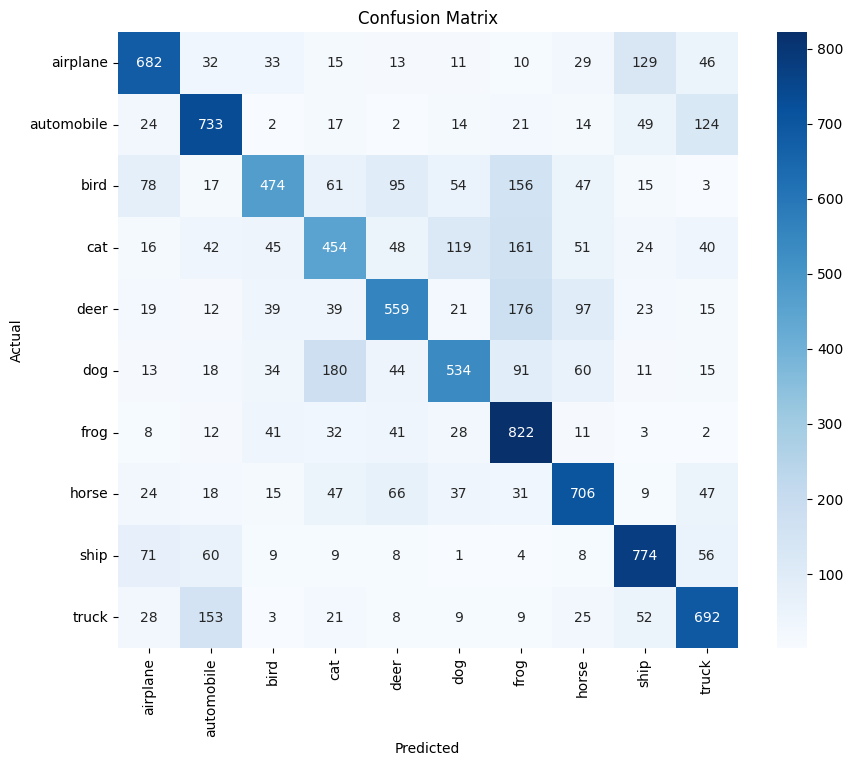

In [47]:
# Convert the one-hot encoded true labels back to integer labels
true_labels = np.argmax(test_labels_cat, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

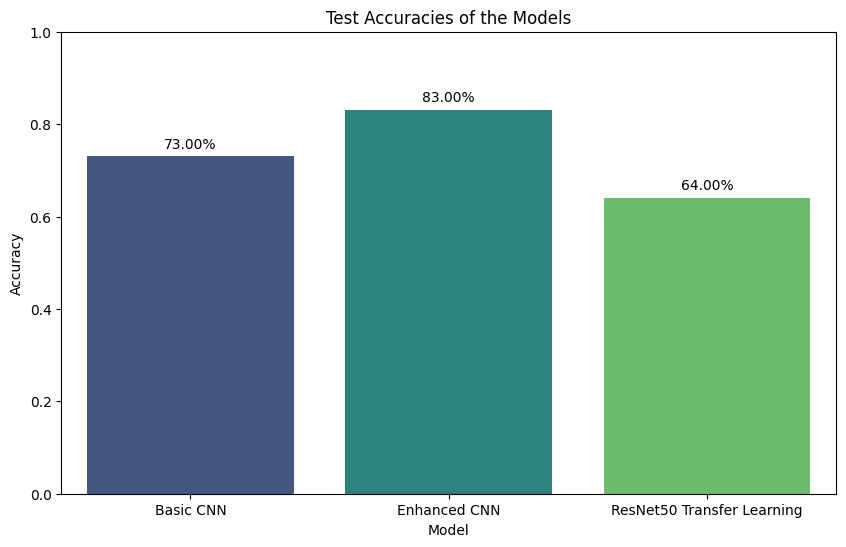

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

accuracies = {
    "Basic CNN": 0.73,
    "Enhanced CNN": 0.83,
    "ResNet50 Transfer Learning": 0.64
}

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.ylim(0, 1)
plt.title('Test Accuracies of the Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()
